In [1]:
path=  'C:/Users/felipe/Documents/Brain/'
import sys
sys.path.append(path) 

In [2]:
path_=  'C:/Users/felipe/Documents/Brain/Models/'
import sys
sys.path.append(path_) 

In [16]:
from mlp_regressor import MLPRegressorCustom
from mlp_regressor import MLPWrapper

from Plotter import Plotter


In [4]:
import pandas as pd
import pickle


file_name = '/Brain_Age/dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"
df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 20].reset_index(drop=True)
# Separar la variable de destino (y) y las características (X)
X = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado["Age"]

In [17]:
mlp_model = MLPRegressorCustom()
mlp_model.set_data(X,y)
Plotters = Plotter()

In [6]:
with open(f'{path}Opt_Model/opt_MLP_model_400iter.pickle', 'rb') as file:
    opt_mlp= pickle.load(file)

In [7]:
errores = opt_mlp.cv_results_['mean_test_score'][:100]


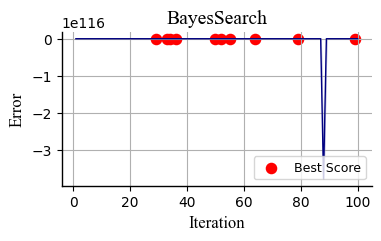

Top 1: Iteration 50, Score -13.241145787428769
Top 2: Iteration 34, Score -13.260045218111904
Top 3: Iteration 52, Score -13.282042412880466
Top 4: Iteration 79, Score -13.308556311665802
Top 5: Iteration 33, Score -13.314481749694753
Top 6: Iteration 99, Score -13.339647851406024
Top 7: Iteration 64, Score -13.359984027047469
Top 8: Iteration 55, Score -13.362700257995499
Top 9: Iteration 29, Score -13.364866967816303
Top 10: Iteration 36, Score -13.366401632528348


In [8]:
Plotter.plot_iteration(y=errores, title='BayesSearch', xlabel='Iteration', ylabel='Error', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2)

In [9]:
best_params_mlp = mlp_model.best_hyper(opt_mlp, num_max=100)

In [ ]:
results, best_model_results , best_model, residual_model= mlp_model.trainer_2(params_=best_params_mlp[0])

In [28]:
#with open(f'{path}Opt_Model_2/BestModel_MLP_all_features.pickle', 'wb') as file:
#    pickle.dump(best_model, file)
#with open(f'{path}/Opt_Model_2/results_MLP_all_features.pickle', 'wb') as file:
#    pickle.dump(results, file)
#with open(f'{path}/Opt_Model_2/residual_model_MLP_model_all_features.pickle', 'wb') as file:
#    pickle.dump(residual_model, file)

In [18]:
with open(f'{path}Opt_Model_2/BestModel_MLP_all_features.pickle', 'rb') as file:
    model =  pickle.load(file)
    
with open(f'{path}Opt_Model_2/results_MLP_all_features.pickle', 'rb') as file:
    results =  pickle.load(file)

with open(f'{path}Opt_Model_2/residual_model_MLP_model_all_features.pickle', 'rb') as file:
    residual_model =  pickle.load(file)

In [ ]:
results

In [19]:
mlp_model.model=model
mlp_model.residual_model = residual_model

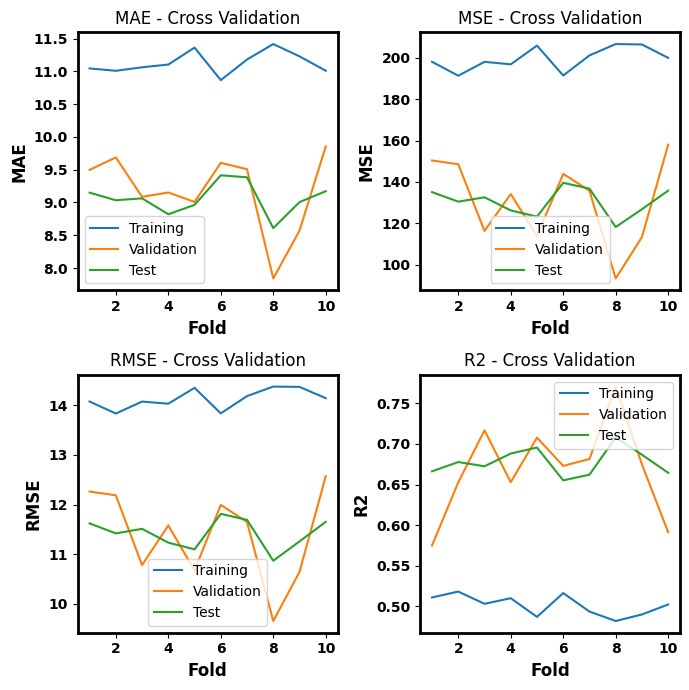

In [12]:
Plotter.plot_metricas_evaluacion(results)

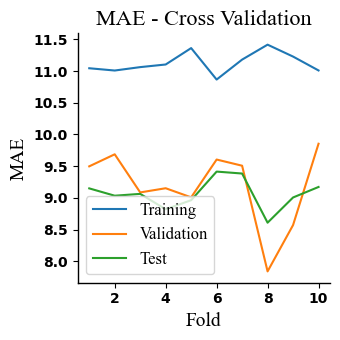

In [13]:
Plotter.plot_metrica_evaluacion(results, font='Times New Roman',mode=2,fontsize=14,x_size=3.5,y_size=3.5 )

In [20]:
y_pred=mlp_model.predicter_corrected_2(X_test= mlp_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     854.7
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           3.24e-86
Time:                        16:37:35   Log-Likelihood:                -1048.9
No. Observations:                 276   AIC:                             2102.
Df Residuals:                     274   BIC:                             2109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1554      1.672      1.289      0.1

C:\Users/felipe/Documents/Brain/Models\Plotter.py:213: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


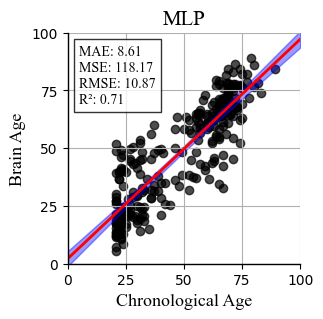

Error medio absoluto: 8.60816336872881
Error cuadrático medio: 118.16588480607314
Raíz del error cuadrático medio: 10.870413276691606
Coeficiente de determinación (R²): 0.7080213625892899


In [22]:
Plotters.plot_regresion(y=y_pred,x= mlp_model.y_test, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title='MLP',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [35]:
with open('y_pred_mlp.txt', 'w') as f:
    for value in y_pred:
        f.write(f"{value:.4f}\n")
with open('y_test_mlp.txt', 'w') as f:
    for value in mlp_model.y_test:
        f.write(f"{value:.4f}\n")

In [ ]:
shap_values, shap_summary_sorted = mlp_model.feature_importance_shap(X_test = mlp_model.X_test, model = mlp_model.model)

In [37]:
with open(f'{path}Opt_Model_2/shap_values_mlp.pickle', 'wb') as file:
        pickle.dump(shap_values, file)
with open(f'{path}Opt_Model_2/shap_summary_sorted_mlp.pickle', 'wb') as file:
        pickle.dump(shap_summary_sorted, file)

In [33]:
shap_summary_sorted

[('Low_subj_spec_EPP_HPC_right', 1289.2270457066022),
 ('Low_subj_spec_EPP_CING_left', 1229.02566919389),
 ('Low_subj_spec_RPD_CING_right', 1024.1955984112574),
 ('Low_subj_spec_RPD_OCC_left', 1021.7607602708252),
 ('TF_MFG_right', 868.5461887783309),
 ('Low_subj_spec_EPP_HPC_left', 844.6037484194213),
 ('IAF_HPC_right', 672.3429108911223),
 ('High_subj_spec_RPD_CING_right', 671.007352238471),
 ('High_subj_spec_EPP_CING_right', 653.5801436705575),
 ('Low_subj_spec_RPD_PARIET_right', 652.6946616673703),
 ('Low_subj_spec_RPD_CING_left', 632.0184153874104),
 ('TF_HPC_right', 615.1556486233094),
 ('Low_subj_spec_EPP_PARIET_left', 536.3697489781501),
 ('Low_subj_spec_EPP_OCC_right', 496.3316326999769),
 ('IAF_OCC_left', 485.2897401621721),
 ('Low_subj_spec_RPD_PARIET_left', 466.0453404973877),
 ('TF_SFG_right', 465.381272573955),
 ('IAF_OCC_right', 457.4036901902707),
 ('Low_subj_spec_RPD_OCC_right', 457.1673695075607),
 ('Alpha2_canon_RPD_HPC_left', 448.0434803162253),
 ('Alpha2_canon_EPP_

In [30]:
shap_por_region_sorted, resultado_normalizado_sorted=mlp_model.shap_region(shap_summary_sorted=shap_summary_sorted, num_max=20)

HPC_right: 1.000000
CING_right: 0.911538
CING_left: 0.722252
OCC_left: 0.584870
OCC_right: 0.547556
HPC_left: 0.501663
PARIET_left: 0.389027
MFG_right: 0.337074
PARIET_right: 0.253304
SFG_right: 0.180610


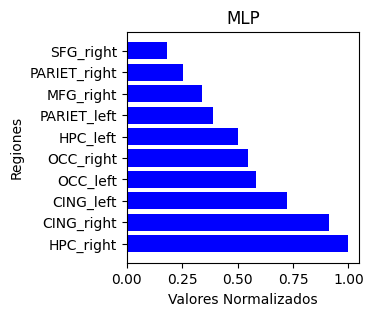

In [31]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color='blue', name_set='MLP',x_size=3,y_size=3)

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


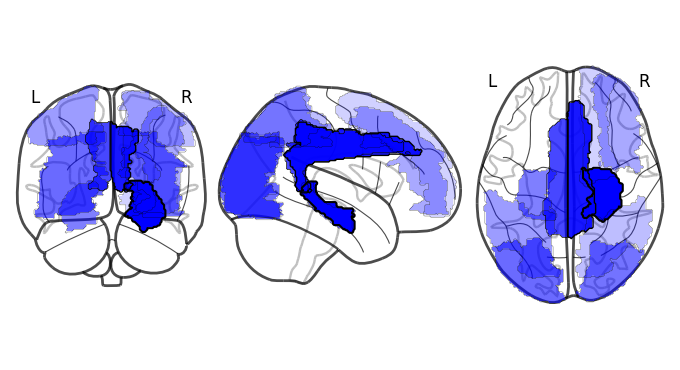

In [32]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color='blue')